In [259]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import pandas 
import numpy as np
import xarray as xr
import xesmf 


In [260]:
ds = xr.open_dataset('/Users/isarios/Hollings_Docs/Hollings/Code/initial_data/zooplankton_data_luo.nc')
ds

<xarray.Dataset>
Dimensions:           (TIME: 12, XT_OCEAN: 360, YT_OCEAN: 200, bnds: 2)
Coordinates:
  * XT_OCEAN          (XT_OCEAN) float64 -279.5 -278.5 -277.5 ... 77.5 78.5 79.5
  * YT_OCEAN          (YT_OCEAN) float64 -81.5 -80.5 -79.5 ... 87.5 88.5 89.5
  * TIME              (TIME) object 2007-01-16 12:00:00 ... 2007-12-16 12:00:00
Dimensions without coordinates: bnds
Data variables:
    YT_OCEAN_bnds     (YT_OCEAN, bnds) float64 ...
    TIME_bnds         (TIME, bnds) object ...
    SMALLZOO_BIOMASS  (TIME, YT_OCEAN, XT_OCEAN) float64 ...
    MEDZOO_BIOMASS    (TIME, YT_OCEAN, XT_OCEAN) float64 ...
    LARGEZOO_BIOMASS  (TIME, YT_OCEAN, XT_OCEAN) float64 ...
    SMALLZOO_PROD     (TIME, YT_OCEAN, XT_OCEAN) float64 ...
    MEDZOO_PROD       (TIME, YT_OCEAN, XT_OCEAN) float64 ...
    LARGEZOO_PROD     (TIME, YT_OCEAN, XT_OCEAN) float64 ...
    GEOLAT_T          (YT_OCEAN, XT_OCEAN) float32 ...
    GEOLON_T          (YT_OCEAN, XT_OCEAN) float32 ...
Attributes:
    history:      FERRET V6.85 (beta) 20-Oct-14
    Conventions:  CF-1.0

In [261]:
##Sum of all Zooplankton biomass
z_biomass=(ds['SMALLZOO_BIOMASS']+ds['MEDZOO_BIOMASS']+ds['LARGEZOO_BIOMASS'])

In [262]:
##Sum of all Zooplankton productivity
z_prod=(ds['SMALLZOO_PROD']+ds['MEDZOO_PROD']+ds['LARGEZOO_PROD'])

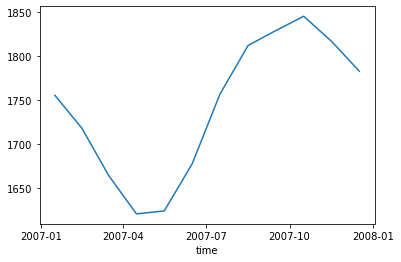

In [263]:
##Mean of Zooplankton bimoass in a year
m_biomass=z_biomass.mean(dim=["XT_OCEAN","YT_OCEAN"]).plot()

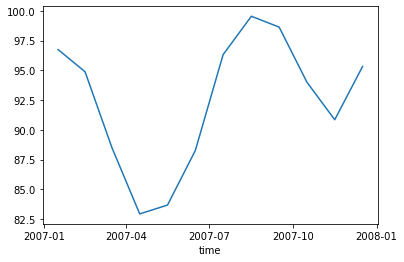

In [264]:
##Mean of Zooplankton peoductivity in a year
m_prod= z_prod.mean(dim=["XT_OCEAN","YT_OCEAN"]).plot()

In [265]:
nm=6

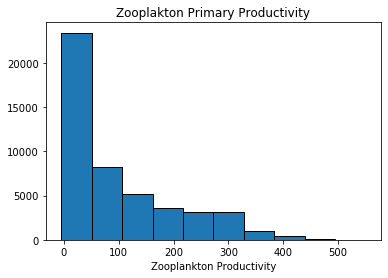

In [266]:
##Historgram Zooplankton Primary Productivity 
fid, ax =  plt.subplots() 
z_prod.isel(TIME=nm).plot.hist(ax=ax,edgecolor='black')
ax.set_title('Zooplankton Primary Productivity')
ax.set_xlabel('Zooplankton Productivity')

plt.show()

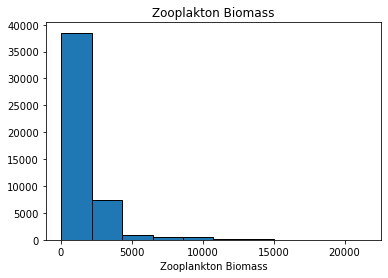

In [267]:
##Historgram Zooplankton Biomass
fid, ax =  plt.subplots() 
z_biomass.isel(TIME=nm).plot.hist(ax=ax,edgecolor='black') 
ax.set_title('Zooplankton Biomass')
ax.set_ylabel('')
ax.set_xlabel('Zooplankton Biomass')
plt.show()

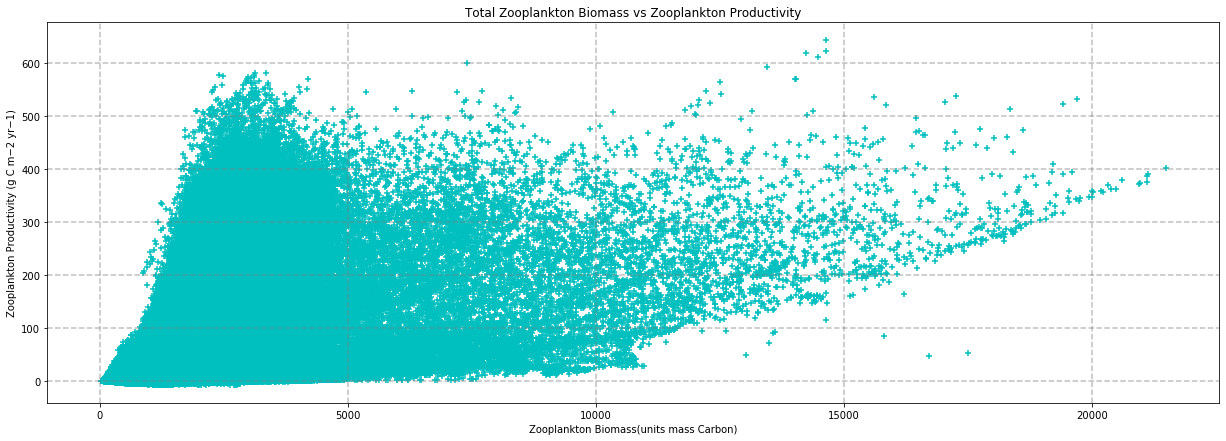

In [277]:
##Scatter plot Zooplankton biomass vs Zooplankton productivity 
fid, ax = plt.subplots(figsize=(21,7)) 

x = z_biomass
y = z_prod

plt.scatter(x, y, marker='+',color='c')
ax.set_title('Total Zooplankton Biomass vs Zooplankton Productivity')
ax.set_ylabel('Zooplankton Productivity (g C m−2 yr−1)')
ax.set_xlabel('Zooplankton Biomass(units mass Carbon)')
ax.grid(linewidth=1.5, color='gray', alpha=0.5, linestyle='--')

plt.show()

In [269]:
##import SST data
df = xr.open_dataset('/Users/isarios/Hollings_Docs/Hollings/Code/Data/temp.nc')
df

<xarray.Dataset>
Dimensions:   (st_ocean: 1, time: 240, xt_ocean: 360, yt_ocean: 200)
Coordinates:
  * st_ocean  (st_ocean) float64 5.0
  * time      (time) object 1988-01-16 12:00:00 ... 2007-12-16 12:00:00
  * xt_ocean  (xt_ocean) float64 -279.5 -278.5 -277.5 -276.5 ... 77.5 78.5 79.5
  * yt_ocean  (yt_ocean) float64 -81.5 -80.5 -79.5 -78.5 ... 86.5 87.5 88.5 89.5
Data variables:
    temp      (time, st_ocean, yt_ocean, xt_ocean) float32 ...
Attributes:
    NCO:      4.0.3
    history:  Wed May 27 10:52:23 2020: ncks -d st_ocean,0 -v temp ocean.1988...

In [270]:
sst=df.temp

In [271]:
sst

<xarray.DataArray 'temp' (time: 240, st_ocean: 1, yt_ocean: 200, xt_ocean: 360)>
[17280000 values with dtype=float32]
Coordinates:
  * st_ocean  (st_ocean) float64 5.0
  * time      (time) object 1988-01-16 12:00:00 ... 2007-12-16 12:00:00
  * xt_ocean  (xt_ocean) float64 -279.5 -278.5 -277.5 -276.5 ... 77.5 78.5 79.5
  * yt_ocean  (yt_ocean) float64 -81.5 -80.5 -79.5 -78.5 ... 86.5 87.5 88.5 89.5
Attributes:
    long_name:      Potential temperature
    units:          degrees C
    valid_range:    [-10. 500.]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    coordinates:    geolon_t geolat_t
    standard_name:  sea_water_potential_temperature

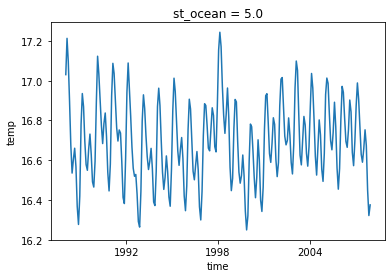

In [272]:
sst.mean(dim=["xt_ocean","yt_ocean"]).plot()

In [273]:
##Cut SST data into the last year (2007) so it matches the zooplkaton biomass data
sst_m=sst.isel(time=slice(228,240))
sst_m

<xarray.DataArray 'temp' (time: 12, st_ocean: 1, yt_ocean: 200, xt_ocean: 360)>
array([[[[nan, ..., nan],
         ...,
         [nan, ..., nan]]],


       ...,


       [[[nan, ..., nan],
         ...,
         [nan, ..., nan]]]], dtype=float32)
Coordinates:
  * st_ocean  (st_ocean) float64 5.0
  * time      (time) object 2007-01-16 12:00:00 ... 2007-12-16 12:00:00
  * xt_ocean  (xt_ocean) float64 -279.5 -278.5 -277.5 -276.5 ... 77.5 78.5 79.5
  * yt_ocean  (yt_ocean) float64 -81.5 -80.5 -79.5 -78.5 ... 86.5 87.5 88.5 89.5
Attributes:
    long_name:      Potential temperature
    units:          degrees C
    valid_range:    [-10. 500.]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    coordinates:    geolon_t geolat_t
    standard_name:  sea_water_potential_temperature

No handles with labels found to put in legend.


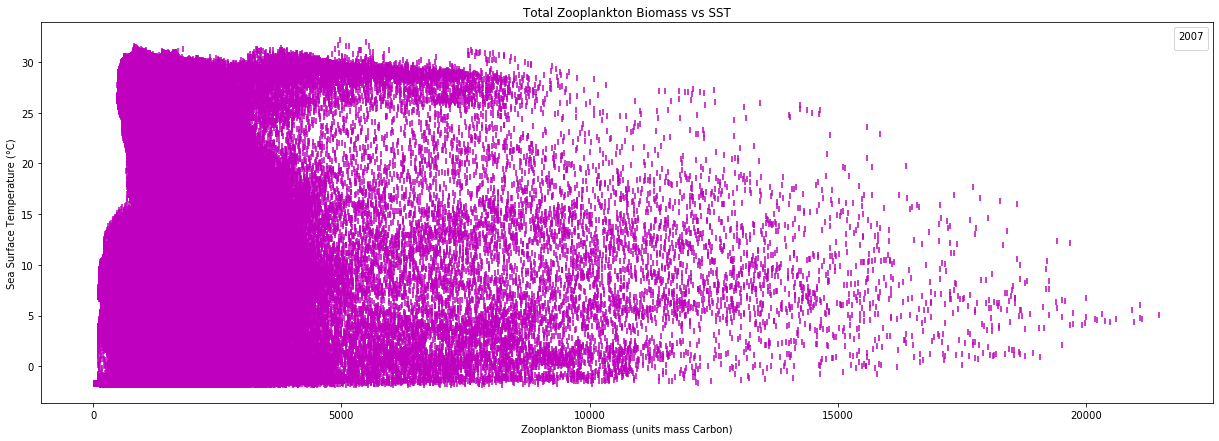

In [275]:
##Zooplankton biomass vs SST in 2007 
fid, ax =  plt.subplots(figsize=(21,7))
x = z_biomass
y = sst_m

ax.set_title('Total Zooplankton Biomass vs SST')
ax.set_ylabel('Sea Surface Temperature (°C)')
ax.set_xlabel('Zooplankton Biomass (units mass Carbon)')

ax.legend(loc="upper right", title="2007")

plt.scatter(x, y, marker='|',color='m')

plt.show()
